In [71]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams['font.family']='AppleGothic'

customer=pd.read_csv('customer_data.csv')
customer

,customer_id,age,gender,country,signup_date,last_active_date,churned,total_purchase
0,1,37.0,Female,Canada,2021-01-01,2021-02-01,0,212.20
1,2,41.0,Male,Japan,2021-01-02,2021-02-02,0,761.70
2,3,46.0,Male,USA,2021-01-03,2021-02-03,0,197.83
3,4,61.0,Male,Japan,2021-01-04,2021-02-04,0,435.39
4,5,55.0,Male,Germany,2021-01-05,2021-02-05,1,826.82
...,...,...,...,...,...,...,...,...
195,196,22.0,Male,France,2021-07-15,2021-08-15,1,742.99
196,197,27.0,Female,Korea,2021-07-16,2021-08-16,0,76.68
197,198,59.0,Female,Japan,2021-07-17,2021-08-17,0,393.42
198,199,55.0,Female,Canada,2021-07-18,2021-08-18,0,560.85


In [72]:
customer.isna().sum()

customer_id          0
age                 10
gender               5
country              0
signup_date          0
last_active_date     0
churned              0
total_purchase       0
dtype: int64

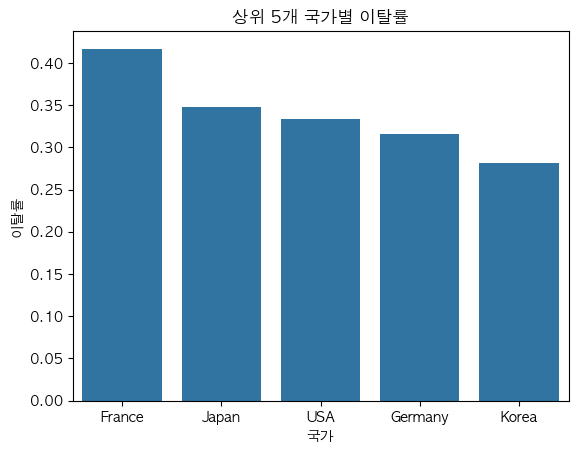

In [73]:
churned_rate=customer.groupby("country")['churned'].mean().sort_values(ascending=False)\
                    .head()

sns.barplot(x=churned_rate.index ,y=churned_rate.values)

plt.title("상위 5개 국가별 이탈률")
plt.xlabel("국가")
plt.ylabel("이탈률")
plt.show()


/var/folders/yj/mr3p43kx0gbdnjqp9p492cbr0000gn/T/ipykernel_10672/2191259608.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  aged_churned=customer.groupby("age_group")['churned'].mean()


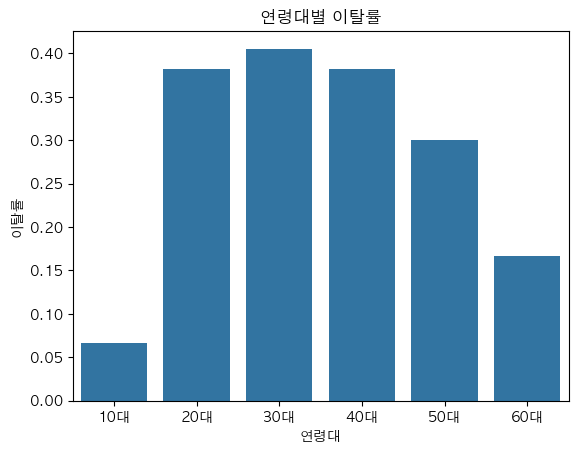

In [74]:
customer['age_group']=pd.cut(customer['age'],bins=[10,20,30,40,50,60,70],labels=["10대","20대","30대","40대","50대","60대"])

aged_churned=customer.groupby("age_group")['churned'].mean()

sns.barplot(x=aged_churned.index , y=aged_churned.values)

plt.title("연령대별 이탈률")
plt.xlabel("연령대")
plt.ylabel("이탈률")
plt.show()

/var/folders/yj/mr3p43kx0gbdnjqp9p492cbr0000gn/T/ipykernel_10672/1222536464.py:11: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


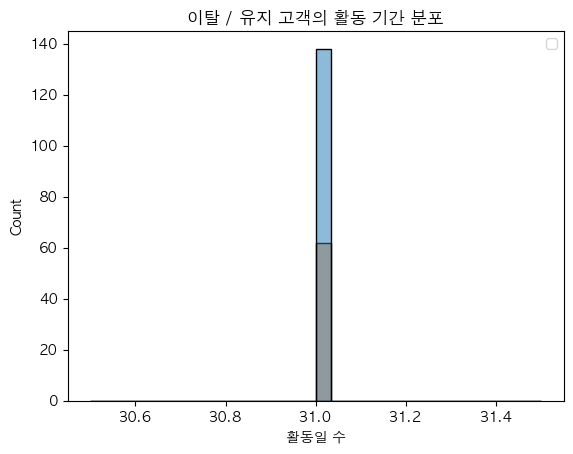

In [75]:
customer['signup_date']=pd.to_datetime(customer['signup_date'])
customer['last_active_date']=pd.to_datetime(customer['last_active_date'])

customer['active_dates']=(customer['last_active_date']-customer['signup_date']).dt.days

sns.histplot(data=customer , x= 'active_dates', hue='churned',kde=True,bins=30)

plt.title("이탈 / 유지 고객의 활동 기간 분포")
plt.xlabel("활동일 수")
plt.ylabel("Count")
plt.legend()
plt.show()

In [76]:
sales=pd.read_csv('sales_data.csv')

sales

,order_id,product_category,order_date,customer_id,amount,is_returned
0,1001,Furniture,2023-01-01,5,181.92,1
1,1002,Beauty,2023-01-02,97,323.98,0
2,1003,Groceries,2023-01-03,81,87.04,0
3,1004,Toys,2023-01-04,2,410.28,1
4,1005,Clothing,2023-01-05,83,473.49,0
...,...,...,...,...,...,...
295,1296,Electronics,2023-10-23,100,329.20,0
296,1297,Clothing,2023-10-24,7,385.58,0
297,1298,Clothing,2023-10-25,37,230.94,0
298,1299,Electronics,2023-10-26,86,28.48,0


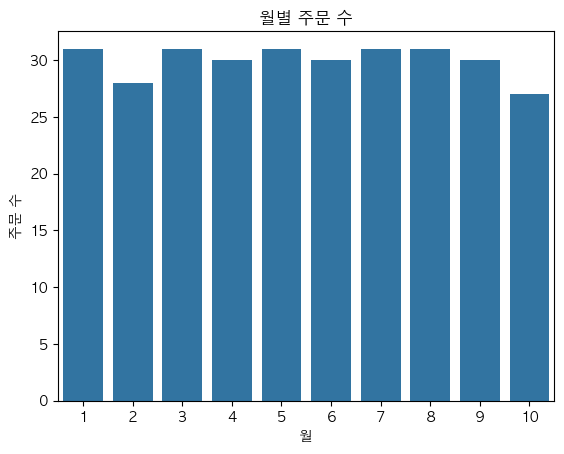

In [77]:
sales['order_date']=pd.to_datetime(sales['order_date'])
sales['month']=sales['order_date'].dt.month #1,2,3,4,5~10

order_month = sales['month'].value_counts().sort_index()

sns.barplot(x= order_month.index , y=order_month.values)
plt.title("월별 주문 수")
plt.xlabel("월")
plt.ylabel("주문 수")
plt.show()


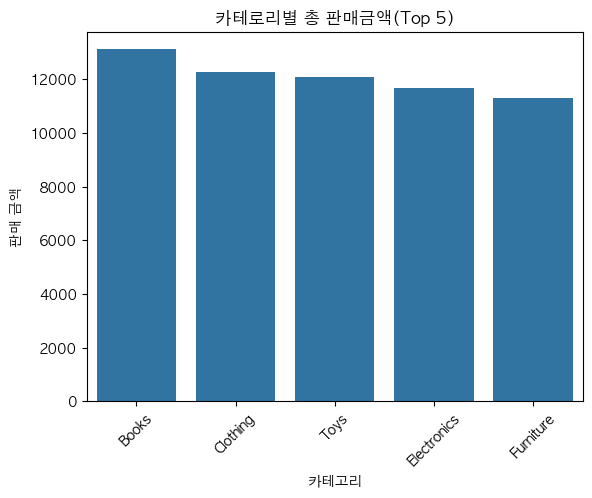

In [78]:
sales_category=sales.groupby('product_category')['amount'].sum()\
                    .sort_values(ascending=False).head()

sns.barplot(x=sales_category.index , y= sales_category.values)

plt.title('카테로리별 총 판매금액(Top 5)')
plt.xlabel("카테고리")
plt.ylabel("판매 금액")
plt.xticks(rotation=45)
plt.show()

In [79]:
sales_is_returned=sales.groupby('product_category')['is_returned'].mean().sort_values(ascending=False).head(3)

sales_is_returned

product_category
Furniture    0.292683
Groceries    0.200000
Toys         0.155556
Name: is_returned, dtype: float64

In [80]:
# total_spent=sales.groupby('customer_id')['amount'].sum().sort_values(ascending=False).head(10)
# order_count=sales.groupby('customer_id')['amount'].count().sort_values(ascending=False).head(10)

customer_stats= sales.groupby('customer_id').agg(
                        total_spent=("amount","sum"),order_count=("order_id","count")
                        ).sort_values(by="total_spent",ascending=False).head(10)

plt.show()

In [89]:
#인덱스를 컬럼으로 변환
customer_stats=customer_stats.reset_index()
#데이터 melt
melted = pd.melt(customer_stats,
								 id_vars = "customer_id",
								 value_vars = ["total_spent", "order_count"],
								 var_name = "type",
								 value_name = "value")
melted

#시각화
plt.figure(figsize=(12,6)) #컨버스 사이즈 12 ,6
sns.barplot(data=melted,x="customer_id",y="value",hue="type")

# plt.title("상위 10위 고객의 총 구매금액 및 구매 횟수")
# plt.xlabel("고객 ID")
# plt.ylabel("값")
# plt.legend(title="항목",labels=["총 구매금액","구매 횟수"])
# plt.show()

ValueError: cannot insert level_0, already exists